### Name : Shreya Dikshit

# Exploratory Data Analysis - Terrorism

## Performing ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

In [1]:
# importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [4]:
data = pd.read_csv('./data/Global Terrorism - START data/globalterrorismdb_0718dist.csv',encoding='latin1')

In [5]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
data.shape

(181691, 135)

In [7]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


## Multivariate Visualizations 

In [11]:
# correlation matrix and heatmap
datacorr = data.corr()
datacorr

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


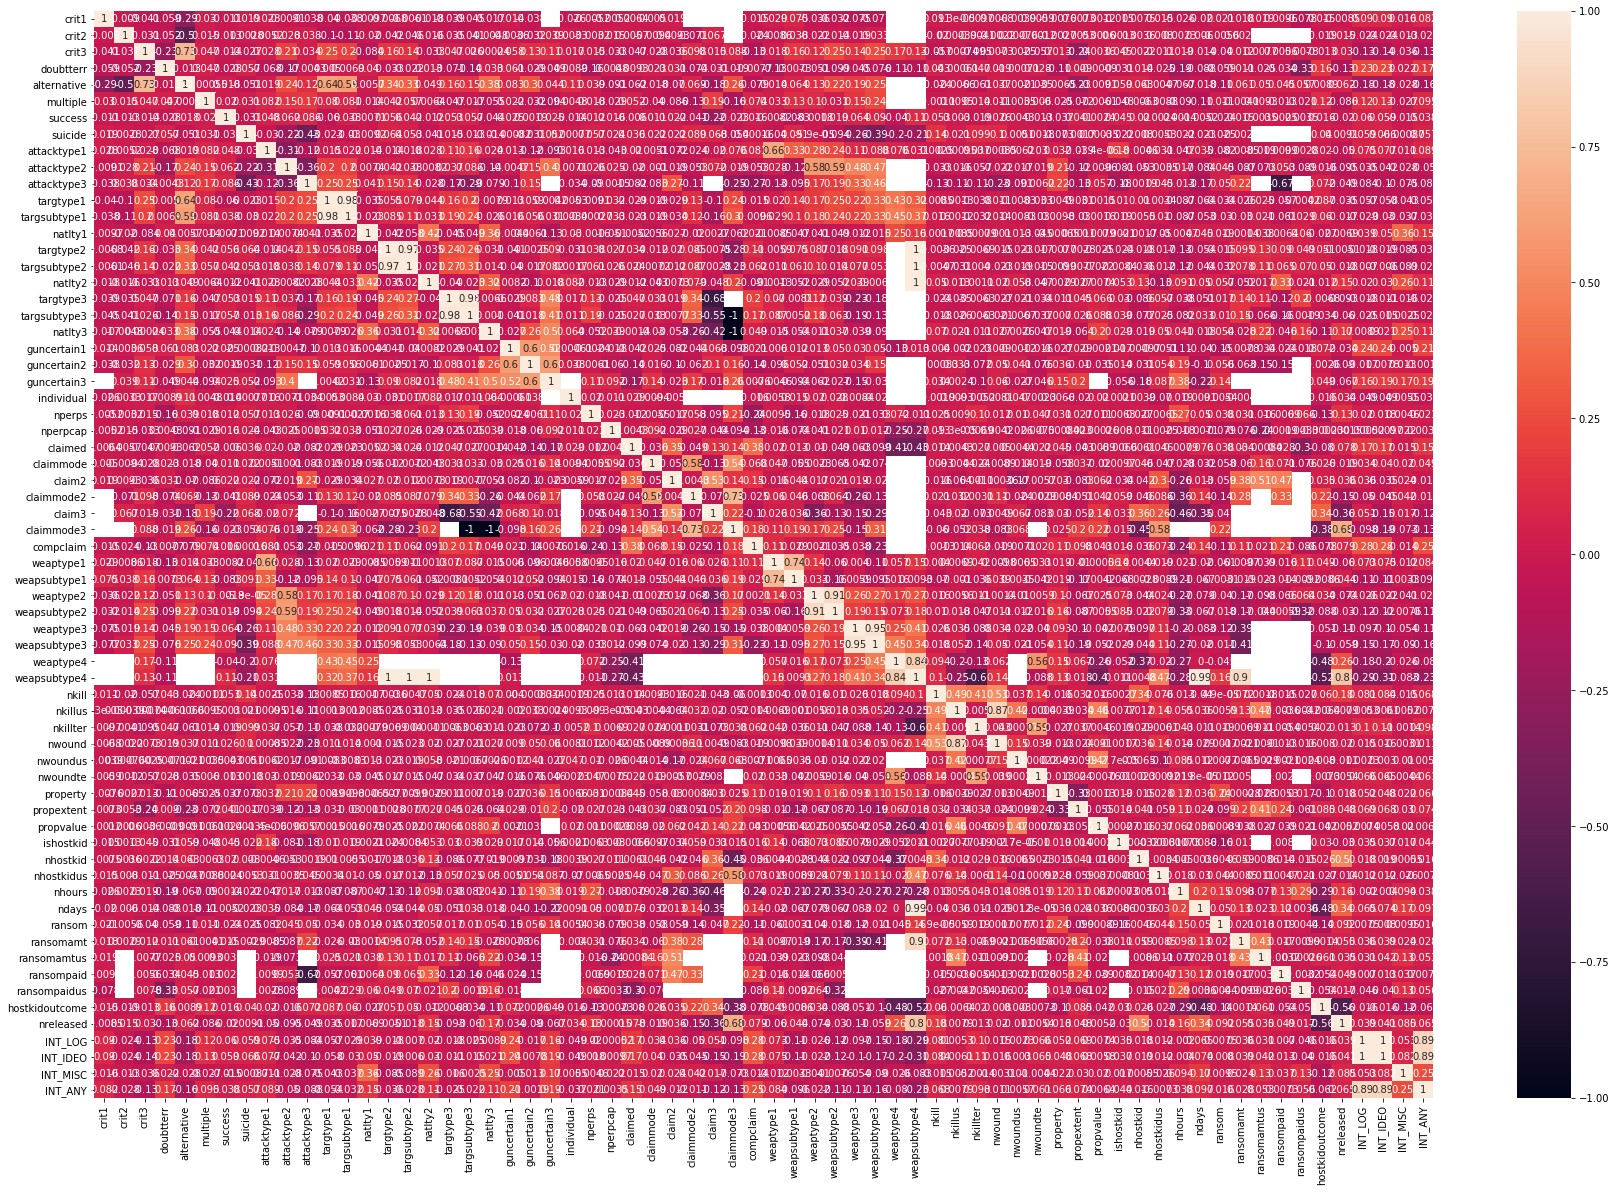

In [12]:
plt.figure(figsize=(30,20))
small = data.drop(['latitude','longitude','specificity'],axis=1)
small = small.iloc[15:,15:]
smallcorr = small.corr()
sns.heatmap(smallcorr, annot=True)

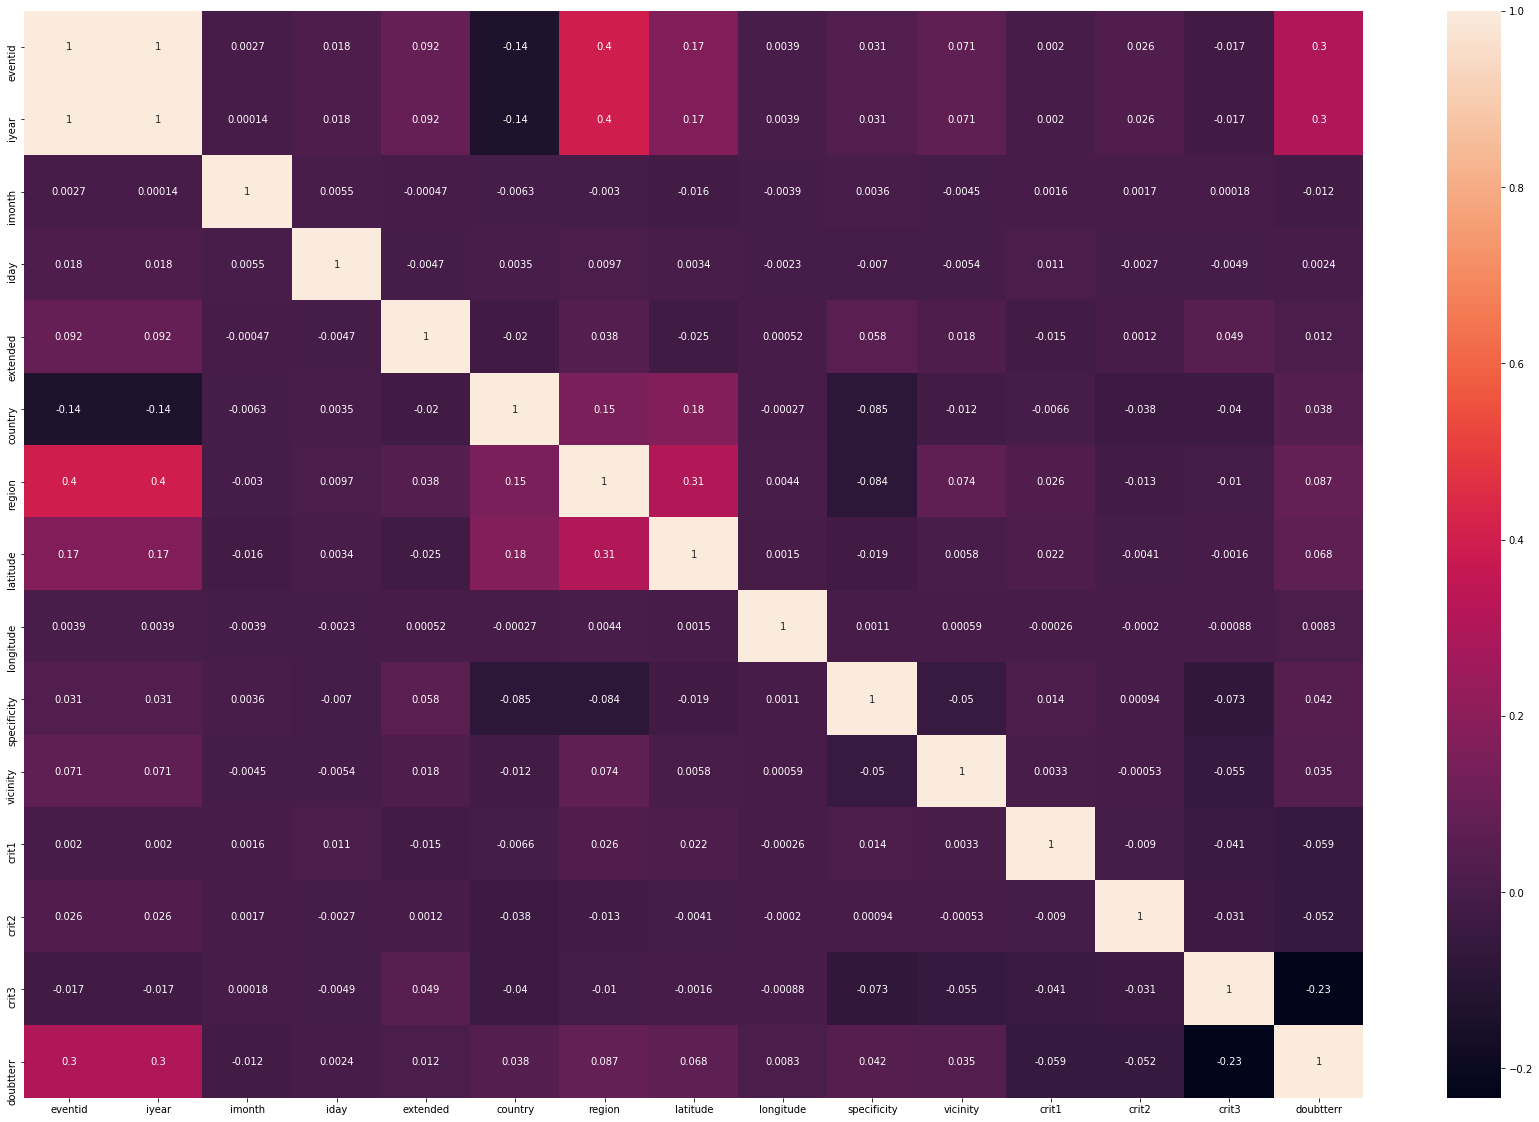

In [13]:
plt.figure(figsize=(30,20))
sns.heatmap(datacorr.iloc[:15,:15], annot=True)

Text(0.5, 1.0, 'Observation in number of events with years')

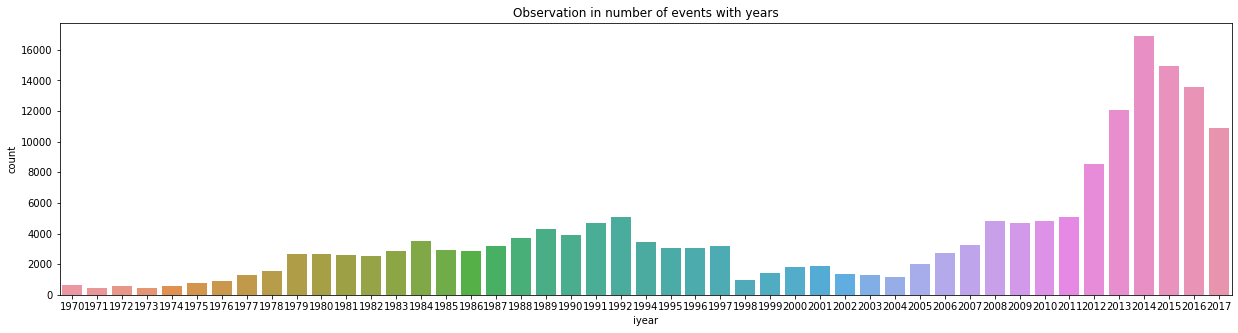

In [14]:
plt.figure(figsize=(21,5))
sns.countplot(data['iyear'])
plt.title('Observation in number of events with years')

Text(0.5, 1.0, 'Incidents extended more than 24 hours or not')

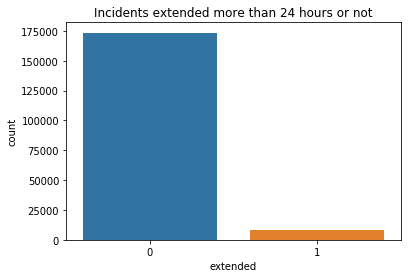

In [15]:
sns.countplot(data['extended'])
plt.title('Incidents extended more than 24 hours or not')

Text(0.5, 1.0, 'Number of attacks which were part of multiple incidents')

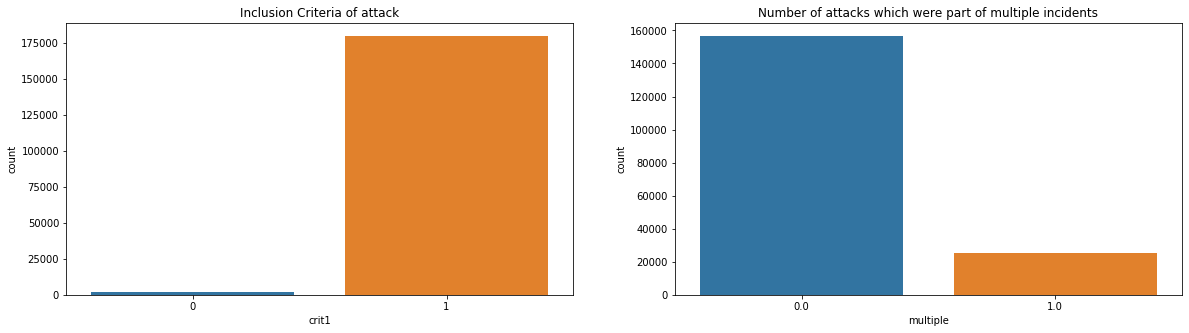

In [16]:
f = plt.figure(figsize=(20,5))
f.add_subplot(121)
# the attacks with crierion1 - political, economic, religious, social cause
sns.countplot(data['crit1'])
plt.title('Inclusion Criteria of attack')

f.add_subplot(122)
sns.countplot(data['multiple'])
plt.title('Number of attacks which were part of multiple incidents')

In [17]:
len(data['country_txt'])

181691

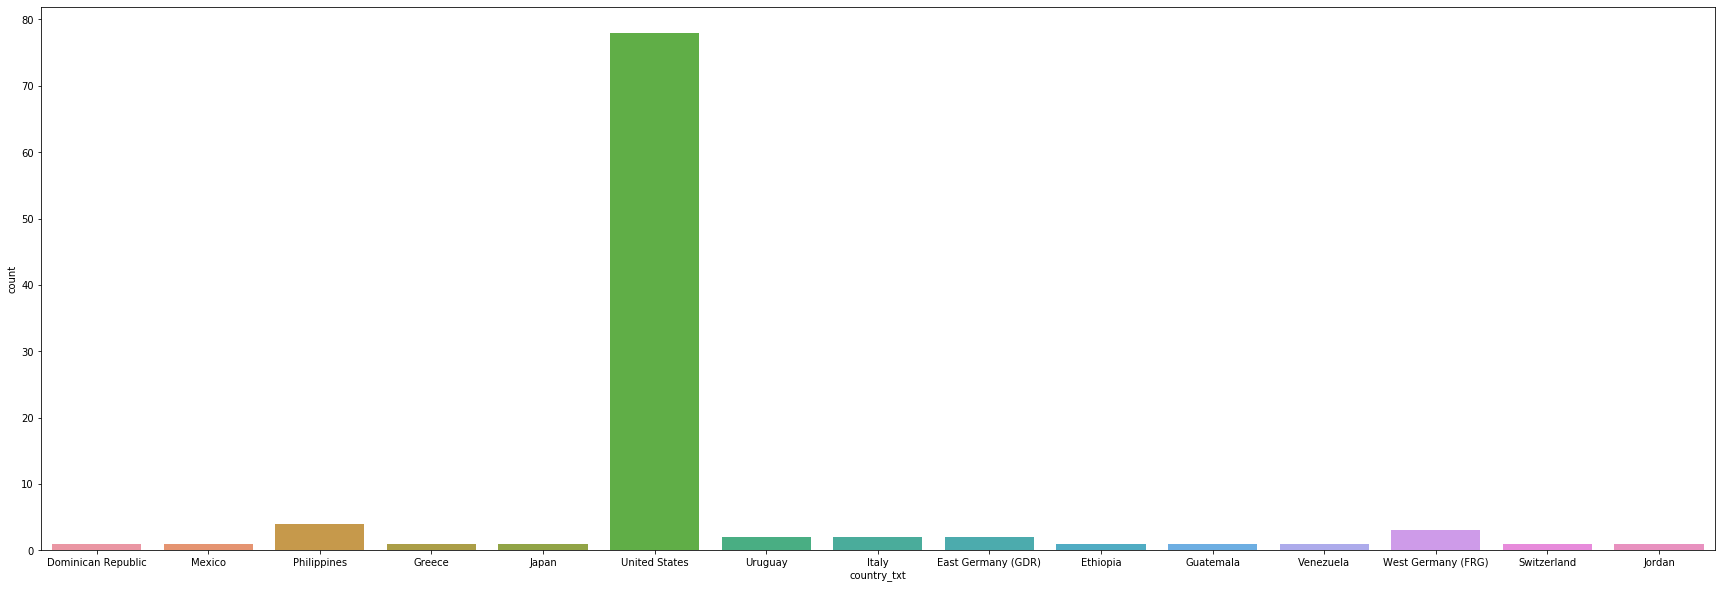

In [18]:
f = plt.figure(figsize=(30,10))
sns.countplot(data['country_txt'].iloc[:100])


In [19]:
len(data[data['country_txt']=='United States'])

2836

In [20]:
data['country_txt'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
Andorra                    1
Antigua and Barbuda        1
International              1
Wallis and Futuna          1
Vatican City               1
Name: country_txt, Length: 205, dtype: int64

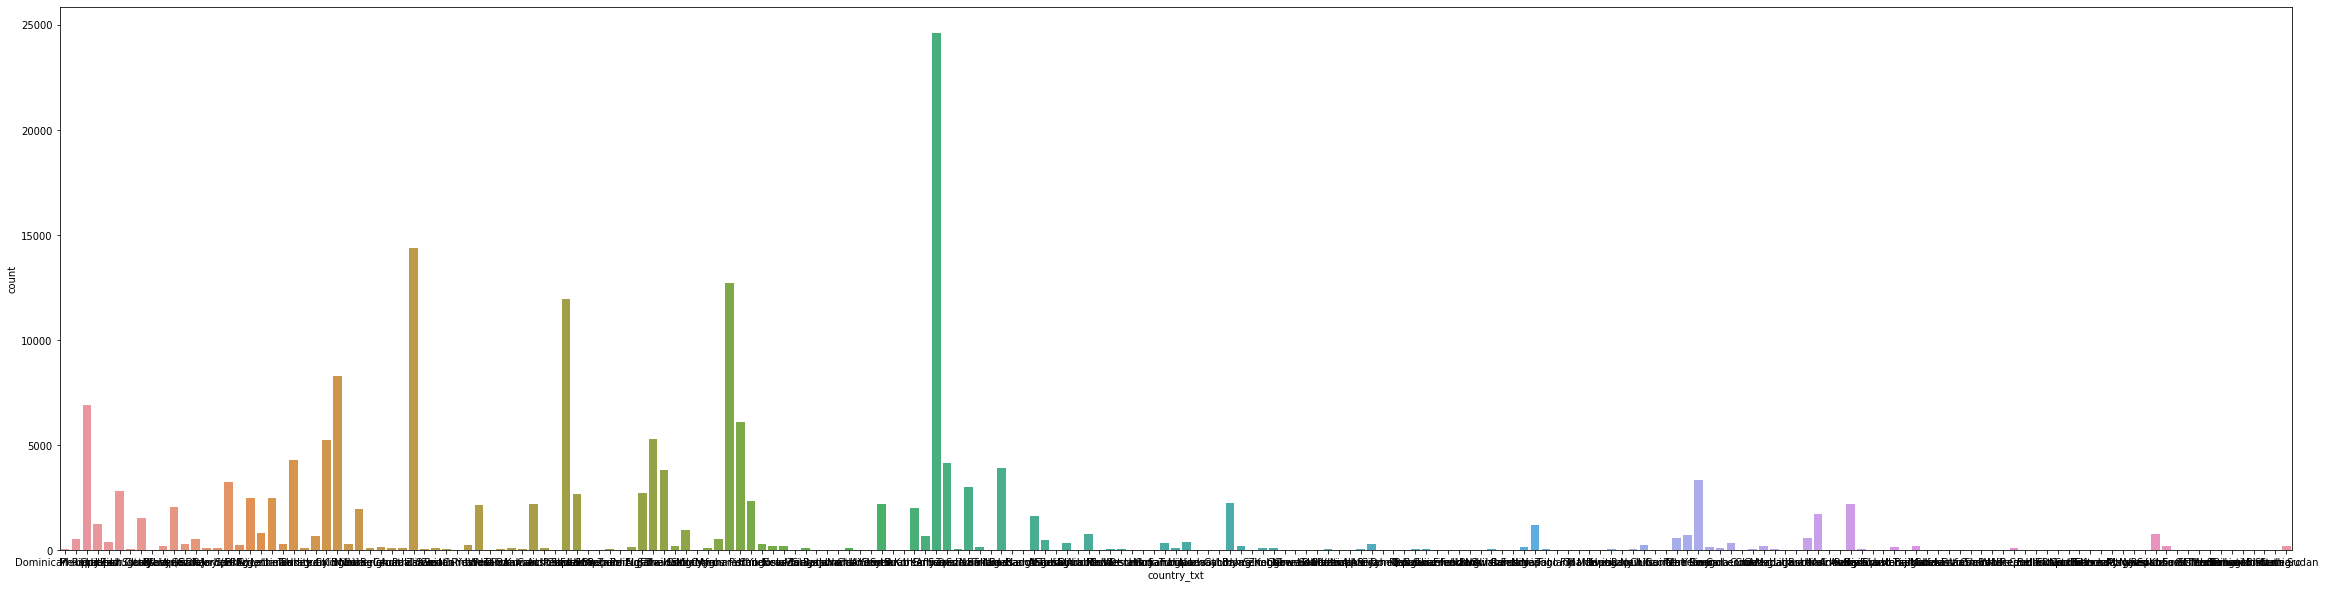

In [21]:
f = plt.figure(figsize=(40,10))
sns.countplot(data['country_txt'][:181691])

In [22]:
data['region'].unique() 
# 1- North America 
# 2- Central America & Caribbean
# 3- South America
# 4- East Asia
# 5- Southeast Asia
# 6- South Asia
# 7- Central Asia
# 8- Western Europe
# 9- Eastern Europe
# 10- Middle East & North Africa
# 11- Sub-Saharan Africa
# 12- Australasia & Oceania

array([ 2,  1,  5,  8,  4,  3,  9, 11, 10, 12,  6,  7])

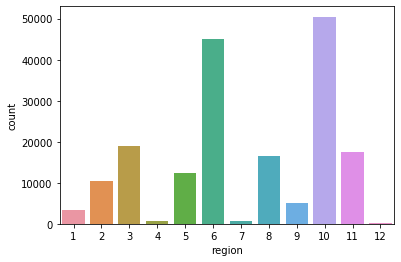

In [23]:
sns.countplot(data['region']) 
# region 10 - Middle East and North Africa have been reported to have more incidents
# followed by South Asia (region 6)

In [24]:
data['attacktype1'].unique() 
# 1 Assassination
# 2 Armed Assault
# 3 Bombing/Explosion
# 4 Hijacking
# 5 Hostage Taking(Barricode Incident)
# 6 Hostage Taking(Kidnapping) 
# 7 Facility/Infrastructure Attack
# 8 Unarmed Assault
# 9 Unknown

array([1, 6, 3, 7, 2, 4, 9, 8, 5])

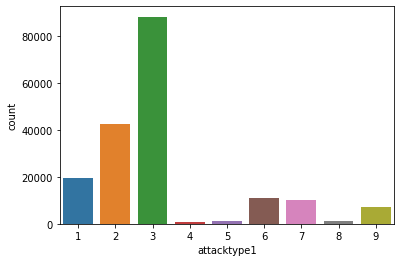

In [25]:
sns.countplot(data['attacktype1'])

In [26]:
# Success of a terrorist attack 
data['success'].unique()

array([1, 0])

Text(0.5, 1.0, 'Success of incident')

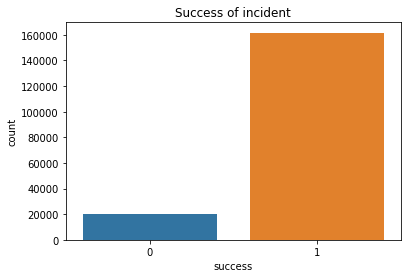

In [27]:
sns.countplot(data['success'])
plt.title("Success of incident")

In [28]:
crosstab = pd.crosstab(data.success, data.iyear)
crosstab

iyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
success,,,,,,,,,,,,,,,,,,,,,
0,102,51,116,40,36,35,62,128,115,254,...,403,291,441,470,922,1552,1888,2289,2612,2248
1,549,420,452,433,545,705,861,1191,1411,2408,...,4402,4430,4385,4606,7600,10484,15015,12676,10975,8652


In [29]:
# weapontype of a terrorist attack 
# 1 Biological
# 2 chemical
# 3 Radiological
# 4 Nuclear
# 5 Firearms
# 6 Explosives
# 7 Fake Weapons
# 8 Incendiary
# 9 Melee
# 10 Vehicle
# 11 Sabotage Equipment
# 12 Other
# 13 Unknown
data['weaptype1'].unique()

array([13,  6,  8,  5,  2,  9, 11, 10,  7,  3, 12,  1])

Text(0.5, 1.0, 'Weapon for attack')

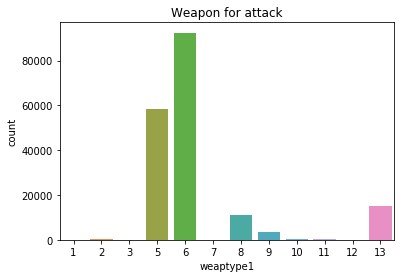

In [30]:
sns.countplot(data['weaptype1'])
plt.title('Weapon for attack')

In [31]:
data['targtype1'].unique()

array([14,  7, 10,  3, 21,  4,  2,  6,  1,  8, 22, 15, 20, 19, 18, 12, 16,
        9, 17, 13, 11,  5])

Text(0.5, 1.0, 'Targets of attack')

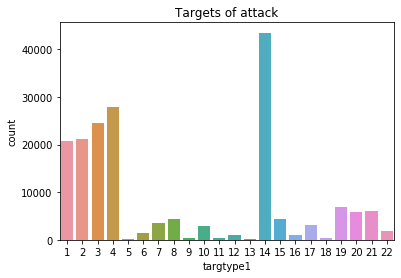

In [32]:
sns.countplot(data['targtype1'])
plt.title('Targets of attack')

In [33]:
data['nperps'].max()

25000.0

In [34]:
data[data['nperps']==data['nperps'].max()].set_index('nperps') 
# the attack on Bangladesh has max number of perpetratos

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
nperps,,,,,,,,,,,,,,,,,,,,,
25000.0,199409100003,1994,9,10,NaN,0,NaN,19,Bangladesh,6,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN


In [35]:
data[data['nperps']==data['nperps'].min()].set_index('nperps') 
# atleast 11 or unknown or if the prepatrators not reported then -99.0 is given to that row

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
nperps,,,,,,,,,,,,,,,,,,,,,
-99.0,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
-99.0,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
-99.0,197001060001,1970,1,6,NaN,0,NaN,217,United States,1,...,NaN,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
-99.0,197001090001,1970,1,9,NaN,0,NaN,217,United States,1,...,NaN,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
-99.0,197001090002,1970,1,9,NaN,0,NaN,217,United States,1,...,The fire began at 8:30 PM. The Armed Commandos...,Committee on the Judiciary United States Sena...,"""No Evidence Of Arson Found In Barkers Fire,"" ...","""Toward People's War for Independence and Soci...",Hewitt Project,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-99.0,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
-99.0,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
-99.0,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN


Text(0.5, 1.0, 'Claims of responsibility of attack taken or not or unknown')

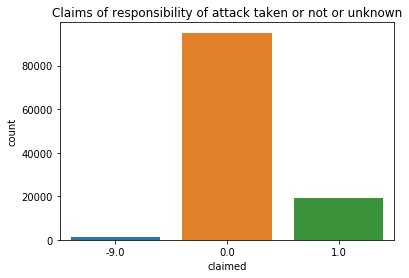

In [36]:
sns.countplot(data['claimed'])
plt.title('Claims of responsibility of attack taken or not or unknown')
# claims are not taken mostly
# more than 80000, the responsibility of attack was not claimed

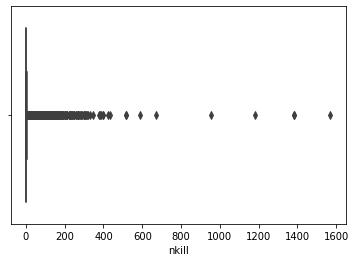

In [37]:
sns.boxplot(data['nkill'])

In [38]:
data[data['country_txt']=='India']

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1186,197202220004,1972,2,22,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN
2764,197501190004,1975,1,2,NaN,0,NaN,92,India,6,...,The case is very unclear and there are many ru...,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",NaN,UMD Encyclopedia of World Terrorism 2012,0,0,0,0,NaN
3857,197605260001,1976,5,26,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
5327,197709280004,1977,9,28,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN
7337,197901130004,1979,1,13,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,12,30,NaN,0,NaN,92,India,6,...,NaN,"""Crude bomb explosion at two places in Kerala'...","""Bomb hurled at police station in Kannur,"" The...","""India:Crude bombs hurled at Koothuparamba pol...",START Primary Collection,-9,-9,0,-9,NaN
181665,201712300023,2017,12,30,NaN,0,NaN,92,India,6,...,NaN,"""Maoists set ablaze seven vehicles in Dantewad...","""Explosives recovered in Jharkhand, Maoists bu...",NaN,START Primary Collection,0,0,0,0,NaN
181672,201712310005,2017,12,31,NaN,0,NaN,92,India,6,...,"The victims included Kuldip Roy, Taufail Ahmed...","""Three soldiers killed in Indian-administered ...","""Fidayeen used armour-piercing bullets in Leth...","""Kashmir gunbattle ends after 16 hrs, body of ...",START Primary Collection,1,1,0,1,NaN
181684,201712310019,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Abducted PSO rescued within 11 hours,"" The Se...",NaN,NaN,START Primary Collection,0,0,0,0,NaN


In [39]:
data[data['iyear']>2000].shape
# these many events took place after 2000

(110041, 135)

In [40]:
events_after_2000 = data[data['iyear']>2000]

Text(0.5, 1.0, 'Number of series of events after year 2000')

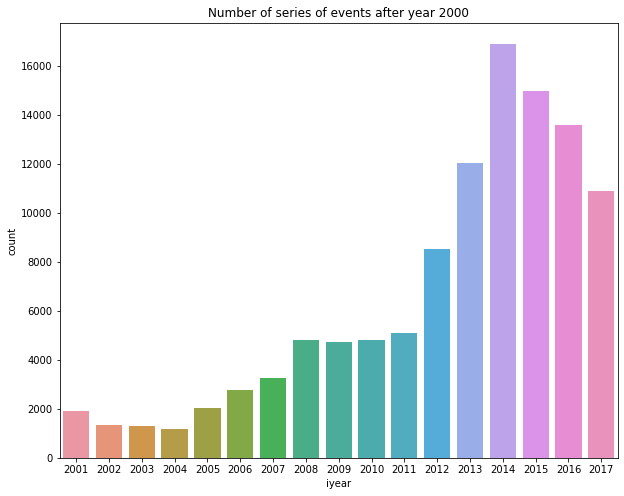

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(events_after_2000['iyear'])
plt.title('Number of series of events after year 2000')

Text(0.5, 1, 'Observation of number of killed and wounded during attack')

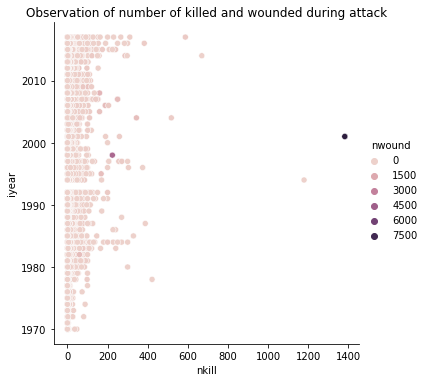

In [42]:
sns.relplot(data=data, x="nkill", y="iyear", hue="nwound")
plt.title('Observation of number of killed and wounded during attack')

Text(0.5, 1.0, 'Observation of number of events the hostage happened')

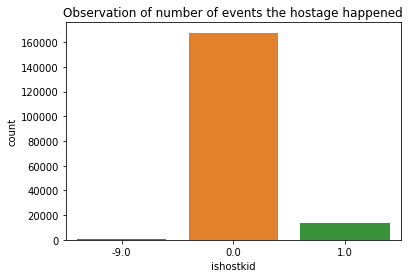

In [43]:
sns.countplot(data['ishostkid'])
plt.title('Observation of number of events the hostage happened')

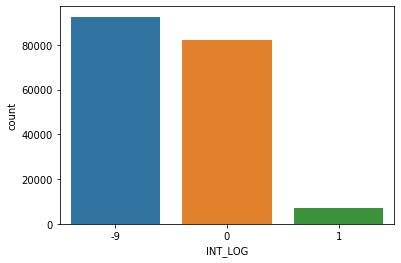

In [44]:
sns.countplot(data['INT_LOG'])

Text(0.5, 1.0, 'Observations of number of hostages- rescued or not')

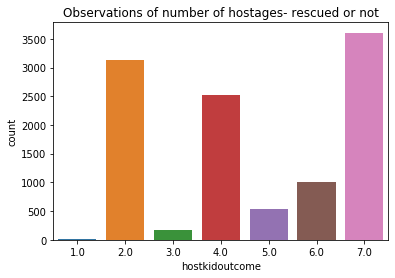

In [45]:
#1 = Attempted Rescue
#2 = Hostage(s) released by perpetrators
#3 = Hostage(s) escaped (not during rescue attempt)
#4 = Hostage(s) killed (not during rescue attempt)
#5 = Successful Rescue
#6 = Combination
#7 = Unknown
sns.countplot(data['hostkidoutcome'])
plt.title('Observations of number of hostages- rescued or not')